In [8]:
import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
data = pd.read_csv('USA Housing Dataset.csv')

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

- There are zero null values, so data is clean

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


- As range of values of features varies, need of standardization

In [16]:
data.city.value_counts().nunique()

34

- As City count is high i'll drop this feature.

In [44]:
# Droping irrelavant features

drop_cols = ['date','street', 'city', 'statezip', 'country']

data = data.drop(columns=drop_cols)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0


In [6]:
correlation_matrix = data.corr()

price_correlation = correlation_matrix['price']

price_correlation

price            1.000000
bedrooms         0.188765
bathrooms        0.317785
sqft_living      0.418528
sqft_lot         0.045964
floors           0.143180
waterfront       0.131401
view             0.217553
condition        0.030327
sqft_above       0.355214
sqft_basement    0.204066
yr_built         0.027067
yr_renovated    -0.028272
Name: price, dtype: float64

- Will drop columns having less than 0.1 corelation

<Axes: >

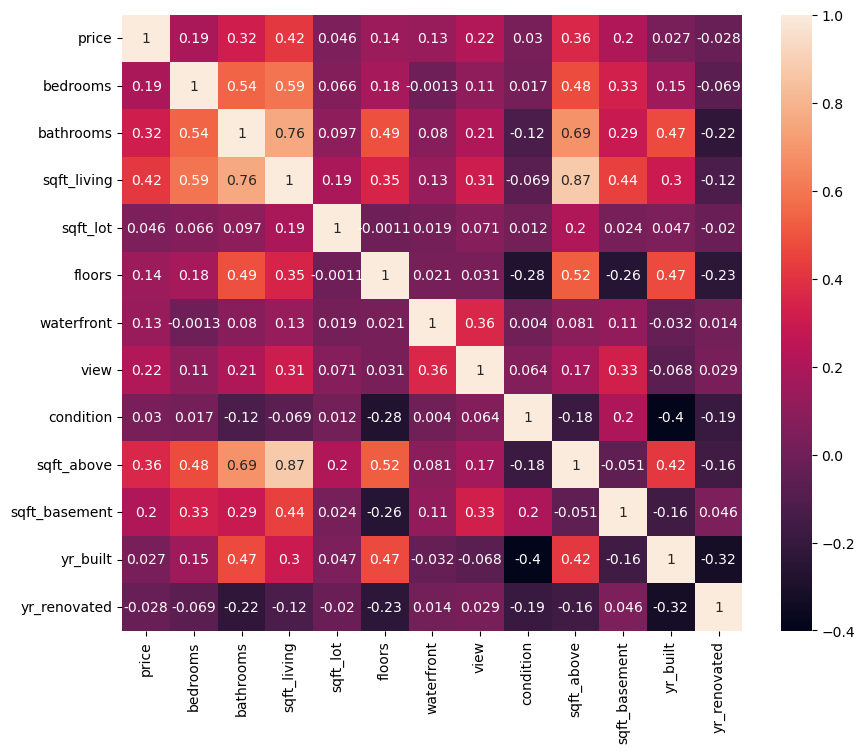

In [76]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot= True)

- Selecting efficient features

In [17]:
features = ['sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 

            'bedrooms', 'floors', 'waterfront']

X = data[features]

y = data['price']

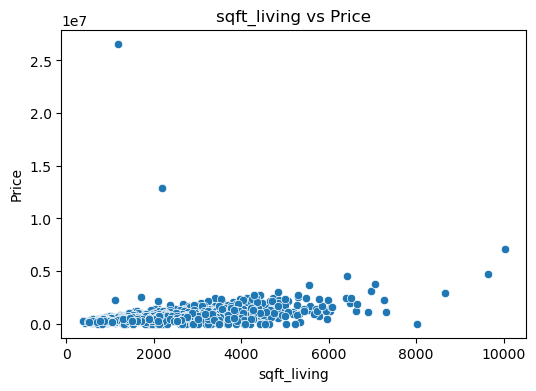

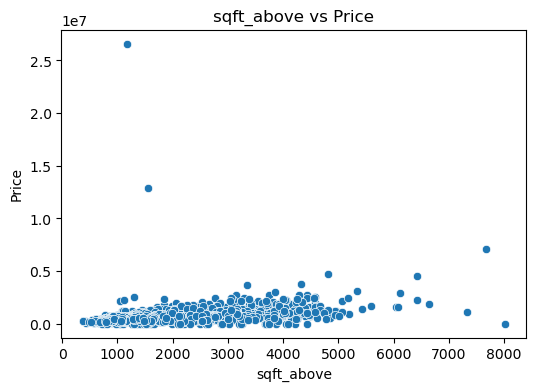

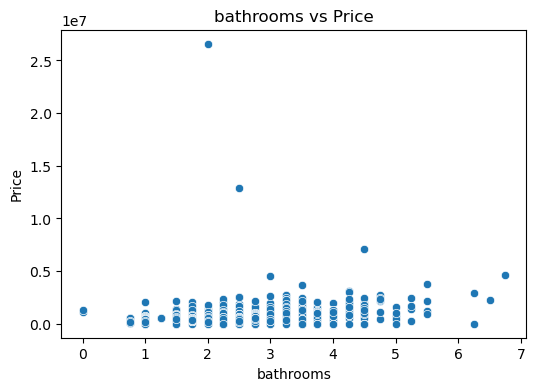

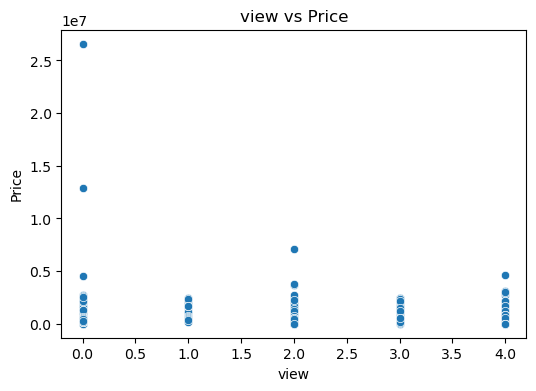

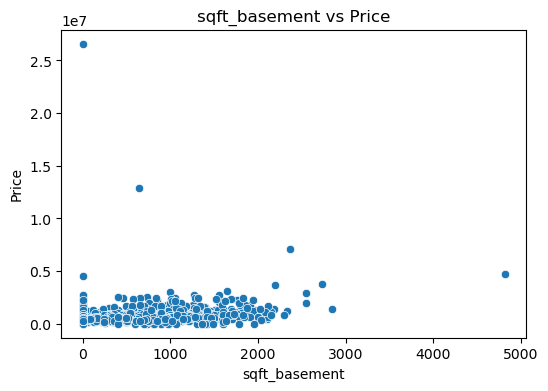

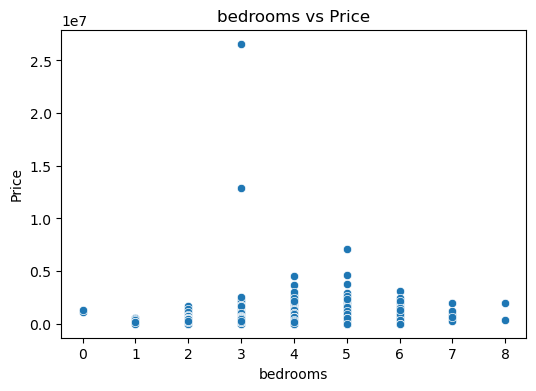

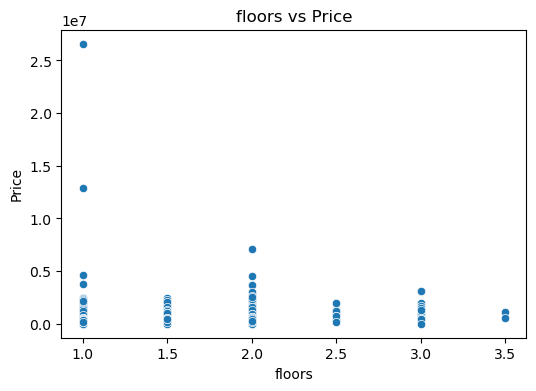

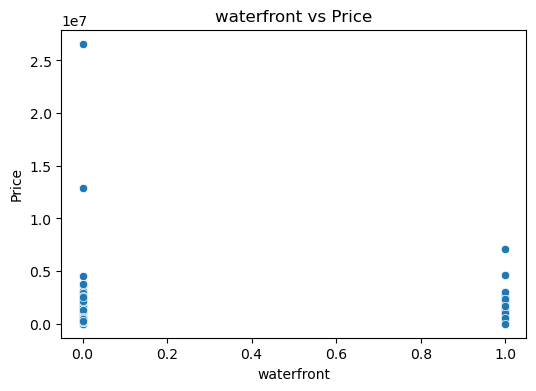

In [80]:
for feature in features:

    plt.figure(figsize=(6, 4))

    sns.scatterplot(x=data[feature], y=y)

    plt.title(f'{feature} vs Price')

    plt.xlabel(feature)

    plt.ylabel('Price')

    plt.show()

- As there are outliers in each feature i will use StandredScaler rather than minmaxscaler, as it is highly sensitive to outliers

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [56]:
linear_model = LinearRegression()

In [72]:
# Train Linear Regression model

linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)

linear_mse = mean_squared_error(y_test, y_pred_linear)

linear_r2 = r2_score(y_test, y_pred_linear)

linear_mse*0.000001, linear_r2*100

(61703.93812583904, 45.62566069876377)

In [58]:
svr_model = SVR()

In [73]:
# Train SVR model

svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

svr_mse = mean_squared_error(y_test, y_pred_svr)

svr_r2 = r2_score(y_test, y_pred_svr)

svr_mse*0.000001, svr_r2*100

(119913.03056268847, -5.668973626251406)

In [60]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [74]:
# Train KNN Regressor model

knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

knn_mse = mean_squared_error(y_test, y_pred_knn)

knn_r2 = r2_score(y_test, y_pred_knn)

knn_mse*0.000001, knn_r2*100

(175685.39618278778, -54.816331541644495)

In [84]:
print('Linear Regression: mse- ', linear_mse*0.000001,', R2 score- ', linear_r2*100)

print('SVM Regression: mse- ', svr_mse*0.000001,', R2 score- ', svr_r2*100)

print('KNN Regression: mse- ', knn_mse*0.000001,', R2 score- ', knn_r2*100)

Linear Regression: mse-  61703.93812583904 , R2 score-  45.62566069876377
SVM Regression: mse-  119913.03056268847 , R2 score-  -5.668973626251406
KNN Regression: mse-  175685.39618278778 , R2 score-  -54.816331541644495


## Conclusion

- The Linear Regression model performs best among the three, with the lowest MSE and good R2 score.